In [53]:
from google.colab import drive
drive.mount("/content/drive")
import pickle
pickled_model = pickle.load(open('/content/drive/MyDrive/ML_Project/last_model', 'rb'))

In [54]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
      await new Promise((resolve) => capture.onclick = resolve);
      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


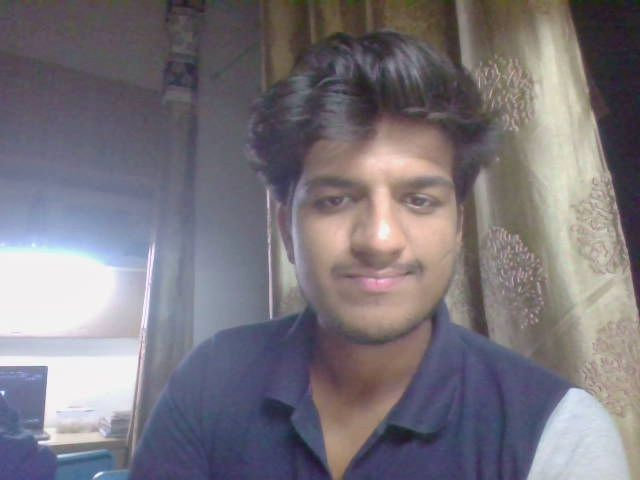

In [26]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  display(Image(filename))
except Exception as err:
  print(str(err))

In [68]:
results = pd.DataFrame(columns=["Location","Predicted_Label","Score"])

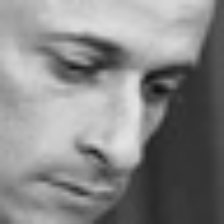

(224, 224, 3)


In [154]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
image_arr=[]
a1 = cv2.imread('/content/drive/MyDrive/ML_Project/test/sad/PublicTest_91140402.jpg')
image = cv2.resize(a1, (224, 224))
grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(grayscale)
print(image.shape)


In [ ]:
# List of Images used
# 1./content/drive/MyDrive/ML_Project/test/happy/PublicTest_93552353.jpg
# 2./content/drive/MyDrive/ML_Project/test/happy/PublicTest_90974681.jpg
# 3./content/drive/MyDrive/ML_Project/test/happy/PublicTest_90837676.jpg

In [155]:
import numpy as np
print(np.shape(grayscale))
grayscale = np.repeat(grayscale[:, :, np.newaxis], 3, axis=2)
print(np.shape(grayscale))

(224, 224)
(224, 224, 3)


In [156]:
import pandas as pd
import numpy as np
ans=pickled_model.predict(np.array(grayscale).reshape(-1,224,224,3))
temp=0
predicted_label=0
if(ans[0][1]>0.5):
  temp=ans[0][1]
  predicted_label=1
else:
  temp=1-ans[0][0]
df2 = {'Location':'/content/drive/MyDrive/ML_Project/test/sad/PublicTest_91140402.jpg','Predicted_Label':predicted_label,'Score': temp,"Result":ans[0]}


1/1 [==============================] - 0s 379ms/step


In [157]:
display(ans)

array([[0.89644384, 0.10355613]], dtype=float32)

In [158]:
results = results.append(df2, ignore_index = True)

In [159]:
display(results)

,Location,Predicted_Label,Score,Result
0,/content/drive/MyDrive/ML_Project/test/happy/P...,1,1.000000,"[4.889708e-09, 1.0]"
1,/content/drive/MyDrive/ML_Project/test/happy/P...,1,1.000000,"[4.0321115e-09, 1.0]"
2,/content/drive/MyDrive/ML_Project/test/happy/P...,1,0.999949,"[5.15104e-05, 0.9999485]"
3,/content/drive/MyDrive/ML_Project/test/happy/P...,1,0.807872,"[0.19212763, 0.80787235]"
4,/content/drive/MyDrive/ML_Project/test/happy/P...,1,0.999783,"[0.00021737398, 0.9997826]"
5,/content/drive/MyDrive/ML_Project/test/sad/Pub...,0,0.015705,"[0.9842951, 0.015704917]"
6,/content/drive/MyDrive/ML_Project/test/sad/Pub...,0,0.001347,"[0.9986528, 0.0013471197]"
7,/content/drive/MyDrive/ML_Project/test/sad/Pub...,0,0.063279,"[0.93672055, 0.0632794]"
8,/content/drive/MyDrive/ML_Project/test/sad/Pub...,0,0.103556,"[0.89644384, 0.103556134]"


TO MAKE A CSV FILE

In [160]:
results = results.sample(frac = 1)
results.to_csv('file1.csv')

In [162]:
display(results)

,Location,Predicted_Label,Score,Result
1,/content/drive/MyDrive/ML_Project/test/happy/P...,1,1.000000,"[4.0321115e-09, 1.0]"
5,/content/drive/MyDrive/ML_Project/test/sad/Pub...,0,0.015705,"[0.9842951, 0.015704917]"
2,/content/drive/MyDrive/ML_Project/test/happy/P...,1,0.999949,"[5.15104e-05, 0.9999485]"
3,/content/drive/MyDrive/ML_Project/test/happy/P...,1,0.807872,"[0.19212763, 0.80787235]"
7,/content/drive/MyDrive/ML_Project/test/sad/Pub...,0,0.063279,"[0.93672055, 0.0632794]"
8,/content/drive/MyDrive/ML_Project/test/sad/Pub...,0,0.103556,"[0.89644384, 0.103556134]"
6,/content/drive/MyDrive/ML_Project/test/sad/Pub...,0,0.001347,"[0.9986528, 0.0013471197]"
4,/content/drive/MyDrive/ML_Project/test/happy/P...,1,0.999783,"[0.00021737398, 0.9997826]"
0,/content/drive/MyDrive/ML_Project/test/happy/P...,1,1.000000,"[4.889708e-09, 1.0]"


In [161]:
!pwd

/content
